In [26]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [11]:
path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

In [12]:
df = mpt.drop_a_column(df, "Unnamed: 0")

In [13]:
f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

In [14]:
df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)

In [15]:
df["day_number"] = df.index + 1

In [16]:
df  = mpt.counter_for_maintenance(df , "2020-02-01 00:00:00", f1_finish)
df  = mpt.counter_for_maintenance(df , f1_finish, f2_finish)
df  = mpt.counter_for_maintenance(df , f2_finish, f3_finish)
df  = mpt.counter_for_maintenance(df , f3_finish, f4_finish)
df = mpt.counter_for_maintenance(df, f4_finish, "2020-09-01 03:59:51")

In [17]:
all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =["counter",'day_number','TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

In [18]:
df_scaled = mpt.scale_columns(df, name_of_the_numerical_columns)
df_scaled.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition,day_number,counter
0,2020-02-01 00:00:00,-0.424441,0.584247,0.531575,-0.20909,0.583993,-1.387941,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732050,-1.372743
1,2020-02-01 00:00:10,-0.425056,0.568600,0.529175,-0.20386,0.568326,-1.376431,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732047,-1.372736
2,2020-02-01 00:00:19,-0.424441,0.552953,0.526175,-0.20386,0.552660,-1.387941,-0.872122,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732045,-1.372729
3,2020-02-01 00:00:29,-0.424441,0.537306,0.523175,-0.20386,0.536993,-1.414797,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732043,-1.372722
4,2020-02-01 00:00:39,-0.424441,0.521659,0.520175,-0.20386,0.521327,-1.407124,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732041,-1.372715


In [19]:
df_clustered = mpt.apply_kmeans_clustering(df_scaled, 5, "condition")
df_clustered["Cluster"].value_counts()

Cluster
3    471682
1    433225
0    374256
2    188251
4     49534
Name: count, dtype: int64

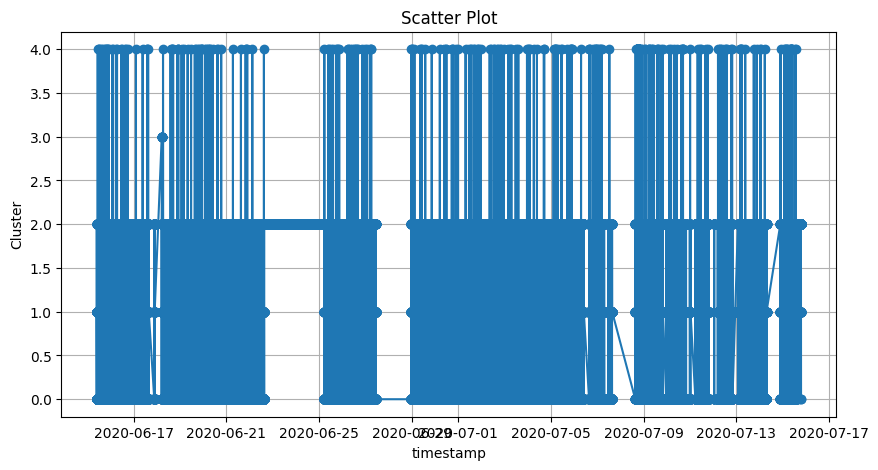

In [20]:
mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df_clustered, "2020-06-15 09:30:00", f4_finish), "timestamp", "Cluster")

In [21]:
mpt.check_cluster_distribution(df_clustered, "condition", "Cluster")


Cluster Distribution by Condition:
 condition       0      1
Cluster                 
0          374251      5
1          433165     60
2          186658   1593
3          471591     91
4           21329  28205


condition,0,1
Cluster,,
0,374251,5
1,433165,60
2,186658,1593
3,471591,91
4,21329,28205


In [22]:
df_last = mpt.drop_a_column(df_clustered, "timestamp")

Until Here, everystep was clear to do

*SMOTE*

In [23]:
dfa = df_last.copy()

In [24]:
dfa = mpt.apply_smote(dfa, "condition", 11)

Before :  condition
0    1486994
1      29954
Name: count, dtype: int64
After :  condition
0    1486994
1    1486994
Name: count, dtype: int64


In [27]:
mpt.apply_random_forest_and_get_results(dfa, "condition")

Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[490228      1]
 [     1 491187]]
            Feature  Importance
3       DV_pressure    0.245724
17          Cluster    0.196491
5   Oil_temperature    0.178357
0               TP2    0.102038
2                H1    0.077871
6     Motor_current    0.054171
8        DV_eletric    0.050016
4        Reservoirs    0.020147
15       day_number    0.019057
16          counter    0.016709
10              MPG    0.014739
1               TP3    0.013781
7              COMP    0.008716
11              LPS    0.001950
14  Caudal_impulses    0.000113
13        Oil_level    0.000080
9            Towers    0.000020
12  Pressure_switch    0.000018


(RandomForestClassifier(random_state=10), 0.9999979621302667)

*Imbalanced Dataset*

In [28]:
dfb = df_last.copy()

In [29]:
mpt.apply_random_forest_and_get_results(dfb, "condition")

Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[490590      0]
 [     6   9997]]
            Feature  Importance
17          Cluster    0.198925
3       DV_pressure    0.173232
16          counter    0.167814
5   Oil_temperature    0.157835
15       day_number    0.105008
1               TP3    0.059333
4        Reservoirs    0.053786
0               TP2    0.027444
2                H1    0.022995
6     Motor_current    0.021336
8        DV_eletric    0.006524
10              MPG    0.002297
11              LPS    0.001664
7              COMP    0.001520
13        Oil_level    0.000179
9            Towers    0.000064
14  Caudal_impulses    0.000040
12  Pressure_switch    0.000005


(RandomForestClassifier(random_state=10), 0.9999880142151408)

Imbalanced - Withouy Day Number

In [30]:
dfc = mpt.drop_a_column(dfb, "day_number")

In [31]:
mpt.apply_random_forest_and_get_results(dfc, "condition")

Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[490590      0]
 [     6   9997]]
            Feature  Importance
15          counter    0.195571
3       DV_pressure    0.191998
16          Cluster    0.186105
5   Oil_temperature    0.171292
4        Reservoirs    0.083107
1               TP3    0.072190
0               TP2    0.043136
6     Motor_current    0.021319
2                H1    0.018602
8        DV_eletric    0.007859
7              COMP    0.003901
10              MPG    0.002890
11              LPS    0.001430
14  Caudal_impulses    0.000239
12  Pressure_switch    0.000175
9            Towers    0.000106
13        Oil_level    0.000079


(RandomForestClassifier(random_state=10), 0.9999880142151408)